## <p style="background-color:#005b96; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">POLICE KILLING_US</p>



"In 2015, The Washington Post began to log [every fatal shooting](https://www.washingtonpost.com/graphics/national/police-shootings-year-end/) by an on-duty police officer in the United States. In that time there have been [more than 5,000 such shootings](https://www.washingtonpost.com/nation/2019/08/09/what-weve-learned-about-police-shootings-years-after-ferguson/?arc404=true) recorded by The Post. After [Michael Brown, an unarmed Black man, was killed](https://www.washingtonpost.com/policeshootings/) in 2014 by police in Ferguson, Mo., a Post investigation found that the [FBI undercounted fatal police shootings](https://www.washingtonpost.com/news/post-nation/wp/2014/09/08/how-many-police-shootings-a-year-no-one-knows/) by more than half. This is because reporting by police departments is voluntary and many departments fail to do so. The Washington Post’s data relies primarily on news accounts, social media postings and police reports. Analysis of more than five years of data reveals that the number and circumstances of fatal shootings and the overall demographics of the victims have remained relatively constant..." [SOURCE ==> Washington Post Article](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/)

[For more information about this story](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/)


This dataset has been prepared by The Washington Post (they keep updating it on runtime) with every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015.

[2016 PoliceKillingUS DATASET](https://www.washingtonpost.com/graphics/national/police-shootings-2016/)<br>
[2017 PoliceKillingUS DATASET](https://www.washingtonpost.com/graphics/national/police-shootings-2017/)<br>
[2018 PoliceKillingUS DATASET](https://www.washingtonpost.com/graphics/2018/national/police-shootings-2018/)<br>
[2019 PoliceKillingUS DATASET](https://www.washingtonpost.com/graphics/2019/national/police-shootings-2019/)<br>
[2020 PoliceKillingUS DATASET](https://www.washingtonpost.com/graphics/national/police-shootings-2017/)<br>

<a id="00"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:#FFF9ED; background-color:#005b96" data-toggle="popover">Content</a>

The file fatal-police-shootings-data.csv contains data about each fatal shooting in CSV format. The file can be downloaded at this URL. Each row has the following variables:

- **id:** a unique identifier for each victim
- **name:** the name of the victim
- **date:** the date of the fatal shooting in YYYY-MM-DD format
- **manner_of_death:** shot, shot and Tasered
- **armed:** indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    - undetermined: it is not known whether or not the victim had a weapon
    - unknown: the victim was armed, but it is not known what the object was
    - unarmed: the victim was not armed
- **age:** the age of the victim
- **gender:** the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    - M: Male
    - F: Female
    - None: unknown
- **race:**
    - W: White, non-Hispanic
    - B: Black, non-Hispanic
    - A: Asian
    - N: Native American
    - H: Hispanic
    - O: Other
    - None: unknown
- **city:** the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
- **state:** two-letter postal code abbreviation
- **signs of mental illness:** News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
- **threat_level:** The threat_level column was used to flag incidents for the story by Amy Brittain in October 2015. http://www.washingtonpost.com/sf/investigative/2015/10/24/on-duty-under-fire/ As described in the story, the general criteria for the attack label was that there was the most direct and immediate threat to life. That would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.
- **flee:** News reports have indicated the victim was moving away from officers
    - Foot
    - Car
    - Not fleeing

The threat column and the fleeing column are not necessarily related. For example, there is an incident in which the suspect is fleeing and at the same time turns to fire at gun at the officer. Also, attacks represent a status immediately before fatal shots by police while fleeing could begin slightly earlier and involve a chase.
- **body_camera:** News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

[SOURCE](https://github.com/washingtonpost/data-police-shootings)

## <p style="background-color:#005b96; font-family:newtimeroman; color:#FFF9ED; font-size:120%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

- **Task 1.** Using Box and Swarm Plots, plotting Age by Gender in terms of "Manner of Death" column of dataframe named as "kill"<br>
- **Task 2.** Plotting Most dangerous cities<br>
- **Task 3.** Plotting Most dangerous states<br>
- **Task 4.** Plotting the killed people having mental illness or not<br>
- **Task 5.** Plotting threat types<br>
- **Task 6.** Plotting flee types<br>

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [5]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

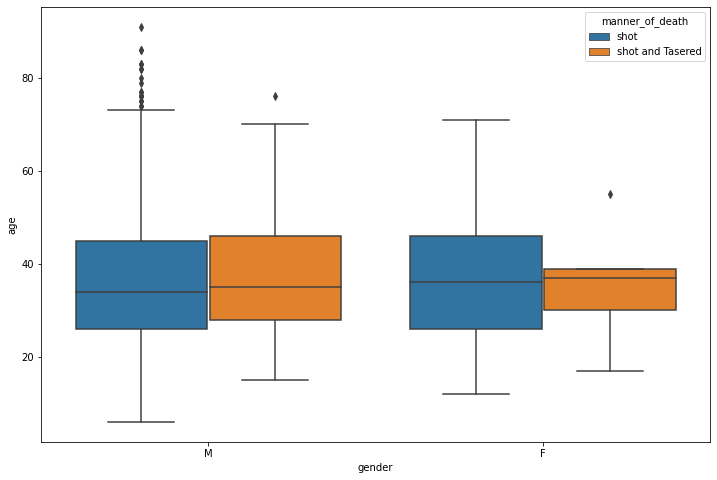

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(data=kill, x='gender', y='age', hue='manner_of_death');


## 1b: Swarm Plot 

**Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

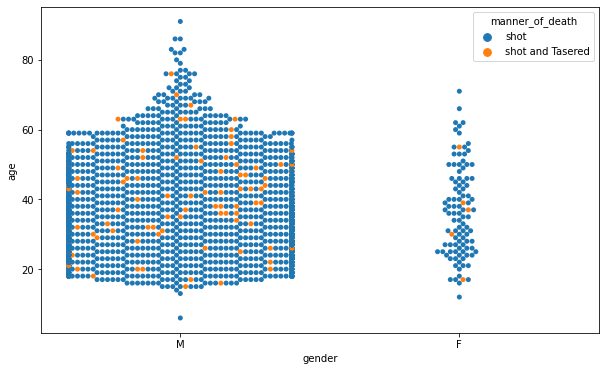

In [8]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=kill, x='gender', y='age', hue='manner_of_death', size=5);

In [16]:
means = kill.groupby('gender')['age'].mean()
medians = kill.groupby('gender')['age'].median()
modes = kill.groupby('gender')['age'].agg(lambda x: pd.Series.mode(x)[0])

print('Means:''\n',means)
print()
print('Medians:''\n', medians)
print()
print('Modes:''\n', modes)


Means:
 gender
F    36.567308
M    36.607052
Name: age, dtype: float64

Medians:
 gender
F    36.0
M    34.0
Name: age, dtype: float64

Modes:
 gender
F    25.0
M    25.0
Name: age, dtype: float64


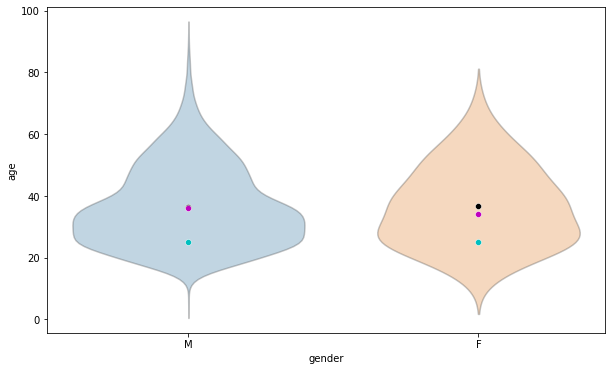

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.violinplot(x="gender", y="age", data=kill, inner=None)

plt.setp(ax.collections, alpha=.3)

sns.scatterplot(x=range(len(means)), y=means, color="k")
sns.scatterplot(x=range(len(medians)), y=medians, color="m")
sns.scatterplot(x=range(len(modes)), y=modes, color="c")
plt.show()

## 2: Plot 12 most dangerous cities

In [55]:
city_freq =kill.city.value_counts().head(12)
city_freq

Los Angeles      39
Phoenix          31
Houston          27
Chicago          25
Las Vegas        21
San Antonio      20
Columbus         19
Austin           18
Miami            18
St. Louis        15
Oklahoma City    14
Tucson           14
Name: city, dtype: int64

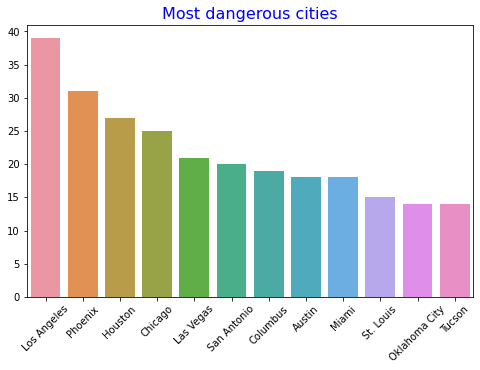

In [37]:
# with seaborn barplot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=kill, x=city_freq.index, y=city_freq.values)
ax.set_title('Most dangerous cities', fontsize=16, color='b')
ax.tick_params(axis='x', rotation=45)

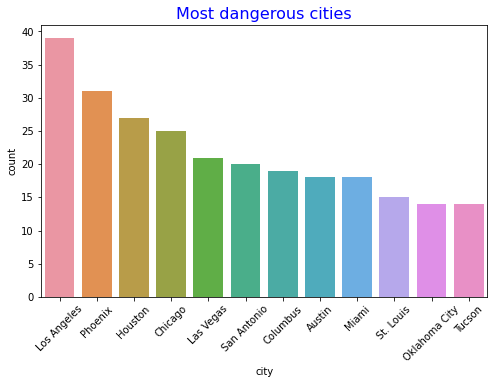

In [78]:
# with seaborn countplot
fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(x='city',
              data=kill,
              order=city_freq.index)
ax.set_title('Most dangerous cities', fontsize=16, color='b')
ax.tick_params(axis='x', rotation=45)

## 3: Plot 20 most dangerous states

In [62]:
state_freq =kill.state.value_counts().head(20)
state_freq


CA    424
TX    225
FL    154
AZ    118
OH     79
OK     78
CO     74
GA     70
NC     69
MO     64
IL     62
WA     62
TN     59
LA     57
PA     51
NM     51
AL     50
VA     47
NY     45
SC     44
Name: state, dtype: int64

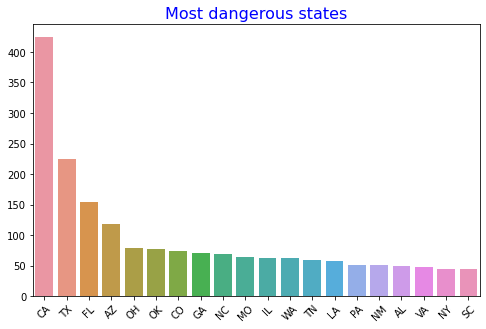

In [63]:
# with seaborn barplot
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(data=kill, x=state_freq.index, y=state_freq.values)
ax.set_title('Most dangerous states', fontsize=16, color='b')
ax.tick_params(axis='x', rotation=45)

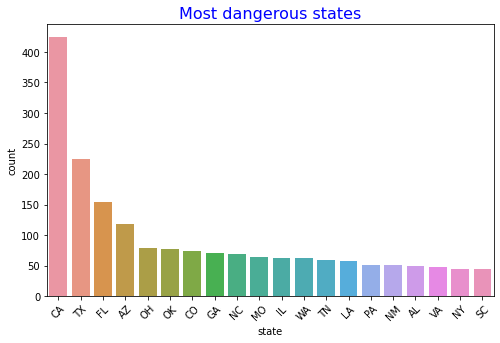

In [77]:
# with seaborn countplot
fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(x='state',
              data=kill,
              order=state_freq.index)
ax.set_title('Most dangerous states', fontsize=16, color='b')
ax.tick_params(axis='x', rotation=45)

## 4: Plot the killed people having mental illness or not

In [20]:
illness =kill.signs_of_mental_illness.value_counts()
illness


False    1902
True      633
Name: signs_of_mental_illness, dtype: int64

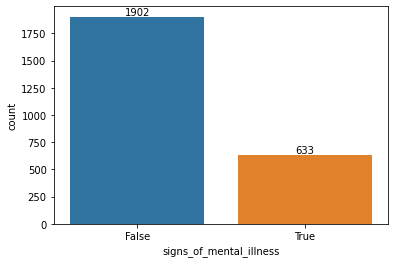

In [21]:
ax = sns.countplot(data=kill, x='signs_of_mental_illness');
for container in ax.containers:
    ax.bar_label(container)

## 5: Plot the number of Threat Types

In [67]:
kill.head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [22]:
threads_freq = kill.threat_level.value_counts()
threads_freq

attack          1611
other            766
undetermined     158
Name: threat_level, dtype: int64

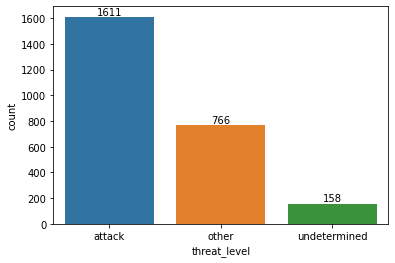

In [23]:
ax = sns.countplot(data=kill, x='threat_level');
for container in ax.containers:ax.bar_label(container)


## 6: Plot number of Flee Types

In [24]:
flee_freq = kill.flee.value_counts()
flee_freq


Not fleeing    1695
Car             385
Foot            294
Other            96
Name: flee, dtype: int64

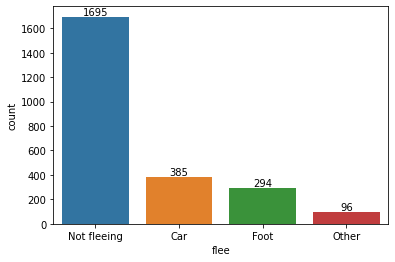

In [25]:
ax = sns.countplot(data=kill, x='flee');
for container in ax.containers:ax.bar_label(container)

## <p style="background-color:#005b96; font-family:newtimeroman; color:#FFF9ED; font-size:120%; text-align:center; border-radius:10px 10px;">END OF NOTEBOOK</p>